# ensemble - hard voting and soft voting

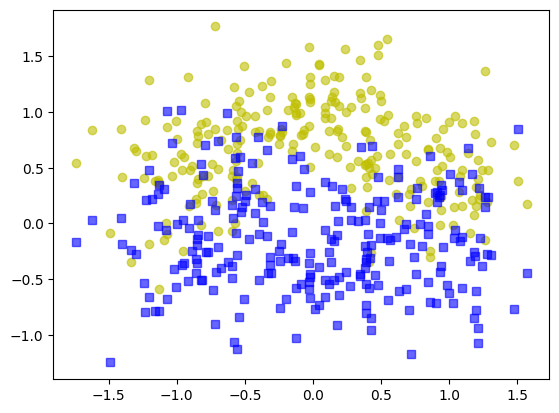

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',alpha = 0.6)
plt.plot(X[:,0][y==0],X[:,1][y==1],'bs',alpha = 0.6)

In [3]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

hardvoting = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)], voting='hard')
hardvoting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rf_clf, svm_clf, hardvoting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.896


In [7]:
svm_clf = SVC(probability=True)
softvoting = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)], voting='soft')
softvoting.fit(X_train, y_train)

y_pred = softvoting.predict(X_test)
print(softvoting.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.904


# bagging

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.904

In [13]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_score(y_test,y_pred_tree)

0.856

Text(0.5, 1.0, 'Decision Tree With Bagging')

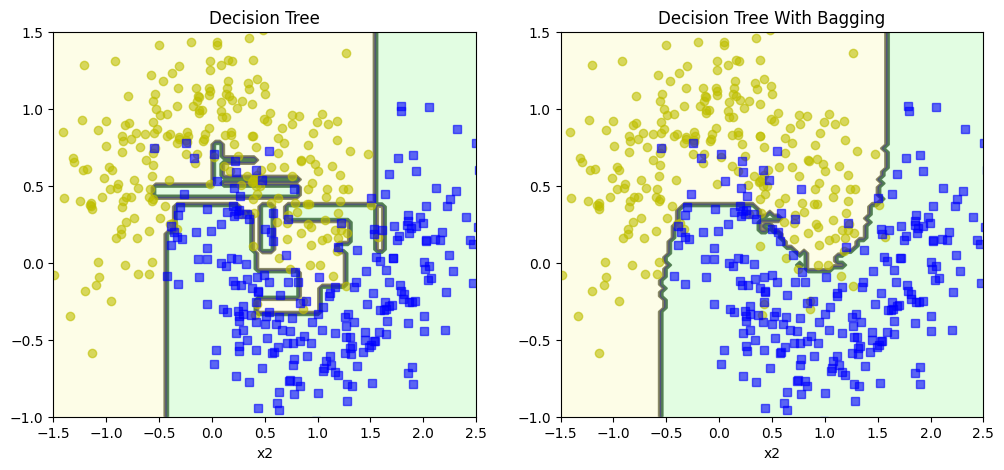

In [16]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5,2.5,-1,1.5], alpha=0.5, contour =True):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, cmap = custom_cmap, alpha=0.3)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2, y_pred, cmap = custom_cmap2, alpha=0.8)
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', alpha = 0.6)
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', alpha = 0.6)
    plt.axis(axes)
    plt.xlabel('x1')
    plt.xlabel('x2') 
    
plt.figure(figsize = (12,5))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title('Decision Tree')
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title('Decision Tree With Bagging')

## OOB (Out of Bag)
samples which were not selected for training can be used to validate

In [17]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, 
                            bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9253333333333333

In [18]:
bag_clf.oob_decision_function_

array([[0.35579515, 0.64420485],
       [0.43513514, 0.56486486],
       [1.        , 0.        ],
       [0.01030928, 0.98969072],
       [0.03174603, 0.96825397],
       [0.07672634, 0.92327366],
       [0.39189189, 0.60810811],
       [0.06145251, 0.93854749],
       [0.92689295, 0.07310705],
       [0.88205128, 0.11794872],
       [0.59850374, 0.40149626],
       [0.04896907, 0.95103093],
       [0.7565445 , 0.2434555 ],
       [0.81377551, 0.18622449],
       [0.88528678, 0.11471322],
       [0.07407407, 0.92592593],
       [0.04738155, 0.95261845],
       [0.92051282, 0.07948718],
       [0.69974555, 0.30025445],
       [0.94358974, 0.05641026],
       [0.06100796, 0.93899204],
       [0.224     , 0.776     ],
       [0.9125964 , 0.0874036 ],
       [0.98746867, 0.01253133],
       [0.95967742, 0.04032258],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.03466667, 0.96533333],
       [0.7020202 , 0.2979798 ],
       [0.

# Random Forest
feature_importances_ is the average depth of a feature, the closer the feature is to the root, the more important it is

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rf_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10657480805840357
sepal width (cm) 0.023332382913186213
petal length (cm) 0.43655063239877506
petal width (cm) 0.4335421766296353


In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', data_home="./")

In [23]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(mnist['data'], mnist['target'])
for name, score in zip(mnist['feature_names'], rf_clf.feature_importances_):
    print(name, score)

pixel1 0.0
pixel2 0.0
pixel3 0.0
pixel4 0.0
pixel5 0.0
pixel6 0.0
pixel7 0.0
pixel8 0.0
pixel9 0.0
pixel10 0.0
pixel11 0.0
pixel12 0.0
pixel13 1.1348210639562072e-07
pixel14 1.2152985238284658e-07
pixel15 6.157207542870431e-08
pixel16 0.0
pixel17 0.0
pixel18 0.0
pixel19 0.0
pixel20 0.0
pixel21 0.0
pixel22 0.0
pixel23 0.0
pixel24 0.0
pixel25 0.0
pixel26 0.0
pixel27 0.0
pixel28 0.0
pixel29 0.0
pixel30 0.0
pixel31 0.0
pixel32 0.0
pixel33 0.0
pixel34 1.1767928963585892e-07
pixel35 1.3822106412530604e-06
pixel36 1.4629690149195704e-06
pixel37 2.5219147744821514e-06
pixel38 2.6613182041225748e-06
pixel39 1.8935199957303164e-06
pixel40 4.288018555143561e-06
pixel41 2.1433563164396614e-06
pixel42 2.3467317406119223e-06
pixel43 3.908796161347737e-06
pixel44 4.0049528968105495e-06
pixel45 5.3623118024268035e-06
pixel46 2.770457954932632e-06
pixel47 9.82483003028186e-07
pixel48 2.421844380009049e-07
pixel49 6.882393457524564e-07
pixel50 6.933183650584071e-07
pixel51 8.082634784945975e-07
pixel52 

In [28]:
mnist['data'].shape

(70000, 784)

[Text(1, 0.0, 'Not important'),
 Text(1, 0.009575618809715138, 'Very important')]

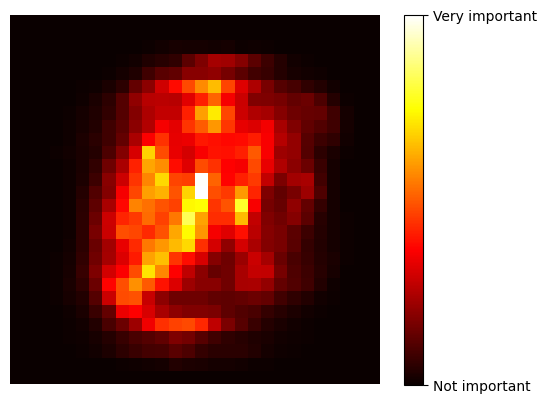

In [33]:
import matplotlib

def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=matplotlib.cm.hot)
    plt.axis('off')
    
plot_digit(rf_clf.feature_importances_)
char = plt.colorbar(ticks=[rf_clf.feature_importances_.min(), rf_clf.feature_importances_.max()])
char.ax.set_yticklabels(['Not important', 'Very important'])

# Boosting
## AdaBoost

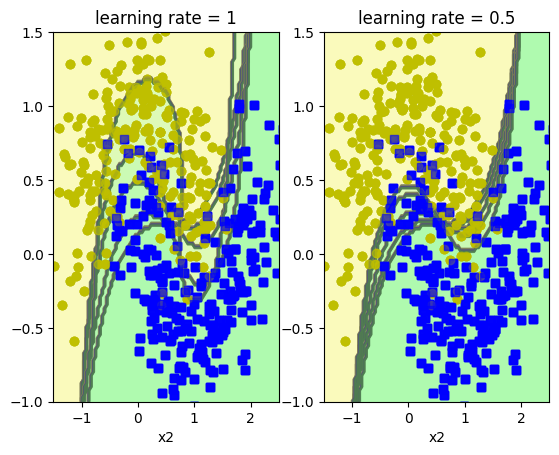

In [37]:
m = len(X_train)

for subplot, lr in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svc_clf = SVC(kernel='rbf', C=0.05, random_state=42)
        svc_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svc_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= 1 + lr  # increase sample weights which were classified wrongly
        plot_decision_boundary(svc_clf, X, y, alpha=0.2)
        plt.title(f"learning rate = {lr}")
plt.show()

D:\code\DL4TAG\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


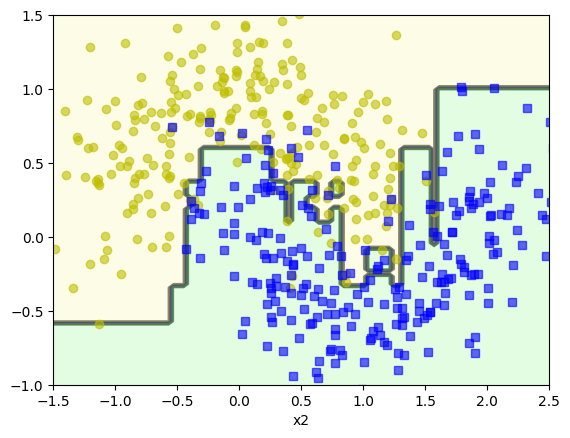

In [38]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5, random_state=42)
abc.fit(X_train, y_train)
plot_decision_boundary(abc, X, y)

## gradient boosting
GBDT

XGBoost

lightGBM

In [39]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [44]:
y2 = y - tree_reg1.predict(X)  # subtraction can make next model focus on samples with wrong prediction
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [45]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

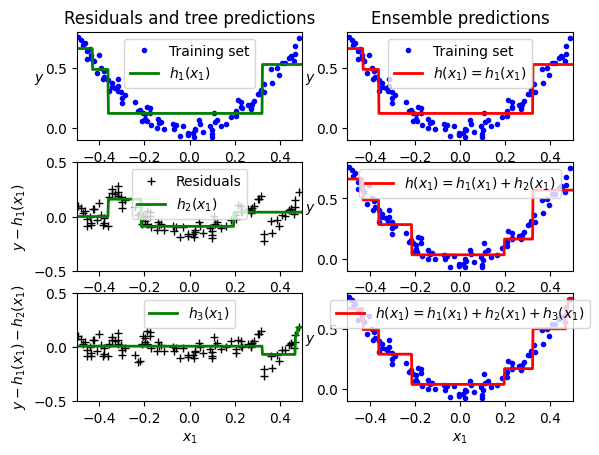

In [47]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", rotation=0)
plt.title("Ensemble predictions")

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$")

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.show()

Text(0.5, 1.0, 'lr=0.1, n_estimators=5')

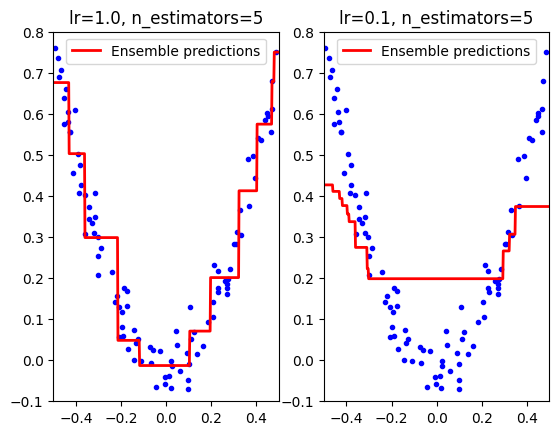

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gbr1 = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=1.0, random_state=42)
gbr1.fit(X, y)

gbr2 = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=0.1, random_state=42)
gbr2.fit(X, y)

plt.subplot(121)
plot_predictions([gbr1],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title(f'lr={gbr1.learning_rate}, n_estimators={gbr1.n_estimators}')
plt.subplot(122)
plot_predictions([gbr2],X,y,axes=[-0.5,0.5,-0.1,0.8],label = 'Ensemble predictions')
plt.title(f'lr={gbr2.learning_rate}, n_estimators={gbr2.n_estimators}')

# early stopping

In [53]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120, random_state = 42)
gbrt.fit(X_train,y_train)

errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]  # staged_predict find the best iteration
best_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = best_n_estimators, random_state = 42)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=117, random_state=42)

Text(0.5, 1.0, 'Best Model(117 trees)')

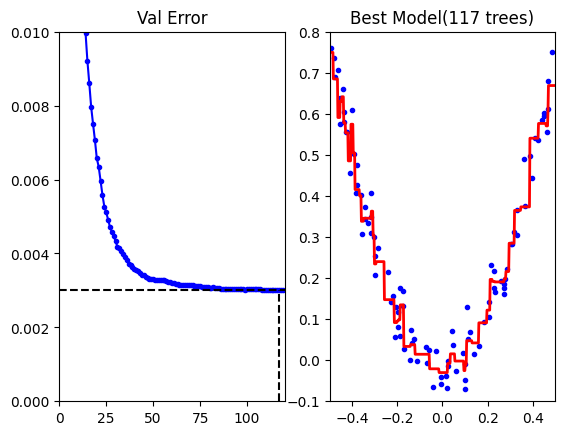

In [55]:
min_error = np.min(errors)

plt.subplot(121)
plt.plot(errors,'b.-')
plt.plot([best_n_estimators, best_n_estimators],[0, min_error],'k--')  # vertical line
plt.plot([0, 120],[min_error, min_error],'k--')  # horizontal line
plt.axis([0, 120, 0, 0.01])
plt.title('Val Error')

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5,0.5,-0.1,0.8])
plt.title('Best Model(%d trees)'%best_n_estimators)

In [60]:
gbrt = GradientBoostingRegressor(max_depth=2, random_state=42, warm_start=True)

min_val_err = float('inf')
try_times = 0
for n in range(1, 120):
    gbrt.n_estimators = n
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_err = mean_squared_error(y_val, y_pred)
    if val_err < min_val_err:
        min_val_err = val_err
        try_times = 0
    else:
        try_times += 1 # the validation error has increased
        if try_times == 5:
            break
            
gbrt.n_estimators_

105

# Stacking

In [62]:
np.savez('mnist_data.npz', data=mnist.data, target=mnist.target)

In [1]:
import numpy as np

mnist = np.load('mnist_data.npz', allow_pickle=True)

In [2]:
print(mnist['data'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
print(mnist['target'])

['5' '0' '4' ... '4' '5' '6']


In [4]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(mnist['data'], mnist['target'], test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

random_forest_clf = RandomForestClassifier(random_state=42)
extra_trees_clf = ExtraTreesClassifier(random_state=42)
# svm_clf = LinearSVC(random_state=42)  # time-consuming
mlp_clf = MLPClassifier(random_state=42)

estimators = [random_forest_clf, extra_trees_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)
    
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)
print(X_val_predictions)

rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)
print(rnd_forest_blender.oob_score_)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the MLPClassifier(random_state=42)
[[5. 5. 5.]
 [8. 8. 8.]
 [2. 2. 2.]
 ...
 [7. 7. 7.]
 [6. 6. 6.]
 [7. 7. 7.]]
0.9701
